In [94]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from fbprophet import Prophet

In [95]:
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False, engine='python')
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False, engine = 'python')
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False, engine = 'python')

Skipping line 263208: unexpected end of data
Skipping line 250525: unexpected end of data


In [96]:
chicago_df_1.shape

(263206, 23)

In [97]:
chicago_df_3.shape

(250523, 23)

In [98]:
chicago_df_2.shape

(33189, 23)

In [99]:
chicago_df_1.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [100]:
chicago_df_1.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
263201,265089,5101073,HM702816,11/05/2006 01:45:00 PM,013XX S MILLARD AVE,0810,THEFT,OVER $500,ALLEY,False,False,1011,10.0,24.0,29.0,06,1152251.0,1893640.0,2006,04/15/2016 08:55:02 AM,41.864013,-87.716570,"(41.864013423, -87.716569827)"
263202,265090,5101074,HM700584,11/03/2006 05:00:00 PM,043XX N WESTERN AVE,0890,THEFT,FROM BUILDING,OTHER,False,False,1912,19.0,47.0,5.0,06,1159588.0,1928932.0,2006,04/15/2016 08:55:02 AM,41.960710,-87.688662,"(41.960709573, -87.688662136)"
263203,265091,5101076,HM703663,11/05/2006 09:00:00 PM,097XX S MORGAN ST,1340,CRIMINAL DAMAGE,TO STATE SUP PROP,"SCHOOL, PUBLIC, BUILDING",False,False,2223,22.0,21.0,73.0,14,1171371.0,1840115.0,2006,04/15/2016 08:55:02 AM,41.716736,-87.647948,"(41.716736461, -87.6479477)"
263204,265092,5101079,HM702827,11/05/2006 12:20:00 PM,058XX N HERMITAGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,False,2012,20.0,40.0,77.0,08B,1163749.0,1938616.0,2006,04/15/2016 08:55:02 AM,41.987196,-87.673090,"(41.987195919, -87.673089817)"
263205,265093,5101080,HM703218,11/05/2006 06:33:00 PM,048XX S ASHLAND AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,931,9.0,20.0,61.0,06,1166487.0,1872711.0,2006,04/15/2016 08:55:02 AM,41.806290,-87.664908,"(41.806289611, -87.664907928)"


In [101]:
chicago_df_2.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,323,3.0,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,1533,15.0,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,831,8.0,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False,1524,15.0,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True,1032,10.0,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [102]:
chicago_df_3.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [103]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])

In [104]:
chicago_df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
5,6,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,False,734,7.0,17.0,67.0,08A,1167688.0,1855998.0,2006,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
6,7,4673632,HM273234,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False,1623,16.0,45.0,11.0,08B,1140791.0,1932993.0,2006,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
7,8,4673633,HM275105,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,False,832,8.0,15.0,66.0,06,1160205.0,1859776.0,2006,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
8,9,4673634,HM275063,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False,1322,12.0,32.0,24.0,08A,1163122.0,1905349.0,2006,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
9,10,4673635,HM268513,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,312,3.0,20.0,42.0,08B,1180669.0,1863047.0,2006,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


In [105]:
chicago_df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
250513,2584495,8701369,HV377382,07/08/2012 04:00:00 AM,050XX N TROY ST,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1713,17.0,33.0,14.0,08A,1154465.0,1933321.0,2012,02/04/2016 06:33:39 AM,41.972857,-87.707379,"(41.972857471, -87.707379054)"
250514,2584496,8701370,HV377581,07/11/2012 01:00:00 AM,002XX W 37TH PL,0460,BATTERY,SIMPLE,APARTMENT,False,False,915,9.0,3.0,34.0,08B,1175138.0,1880096.0,2012,02/04/2016 06:33:39 AM,41.826366,-87.632958,"(41.826365716, -87.632958477)"
250515,2584497,8701372,HV377551,07/11/2012 03:00:00 AM,051XX W WOLFRAM ST,0810,THEFT,OVER $500,RESIDENTIAL YARD (FRONT/BACK),False,False,2521,25.0,31.0,19.0,06,1141680.0,1918466.0,2012,02/04/2016 06:33:39 AM,41.932341,-87.754761,"(41.932340716, -87.754761397)"
250516,2584498,8701373,HV377617,07/11/2012 01:50:00 PM,033XX S DAMEN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,912,9.0,11.0,59.0,08B,1163558.0,1882690.0,2012,02/04/2016 06:33:39 AM,41.833735,-87.675370,"(41.833735126, -87.675370229)"
250517,2584499,8701374,HV377250,07/11/2012 10:20:00 AM,039XX W WRIGHTWOOD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,2524,25.0,30.0,22.0,08B,1149493.0,1916996.0,2012,02/04/2016 06:33:39 AM,41.928159,-87.726088,"(41.928158638, -87.726087574)"
250518,2584500,8701375,HV377423,07/11/2012 11:24:00 AM,016XX W 51ST ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,931,9.0,16.0,61.0,08B,1166120.0,1870892.0,2012,02/04/2016 06:33:39 AM,41.801306,-87.666306,"(41.801305888, -87.66630573)"
250519,2584501,8701376,HV377180,07/10/2012 03:00:00 PM,022XX N KENNETH AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2522,25.0,31.0,20.0,14,1146354.0,1914460.0,2012,02/04/2016 06:33:39 AM,41.921260,-87.737687,"(41.921260035, -87.737687102)"
250520,2584502,8701377,HV377580,07/11/2012 01:00:00 PM,054XX S HALSTED ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,934,9.0,20.0,61.0,04B,1171892.0,1868942.0,2012,02/04/2016 06:33:39 AM,41.795830,-87.645195,"(41.795830016, -87.645195004)"
250521,2584503,8701378,HV377538,07/11/2012 01:06:00 PM,015XX W ROOSEVELT RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1231,12.0,2.0,28.0,14,1166391.0,1894786.0,2012,02/04/2016 06:33:39 AM,41.866868,-87.664630,"(41.866867658, -87.664629717)"
250522,2584504,8701379,HV377552,07/11/2012 12:50:00 PM,050XX W BLOOMINGDALE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2533,25.0,37.0,25.0,08B,1142536.0,1911499.0,2012,02/04/2016 06:33:39 AM,41.913207,-87.751789,"(41.913206651, -87.751789294)"


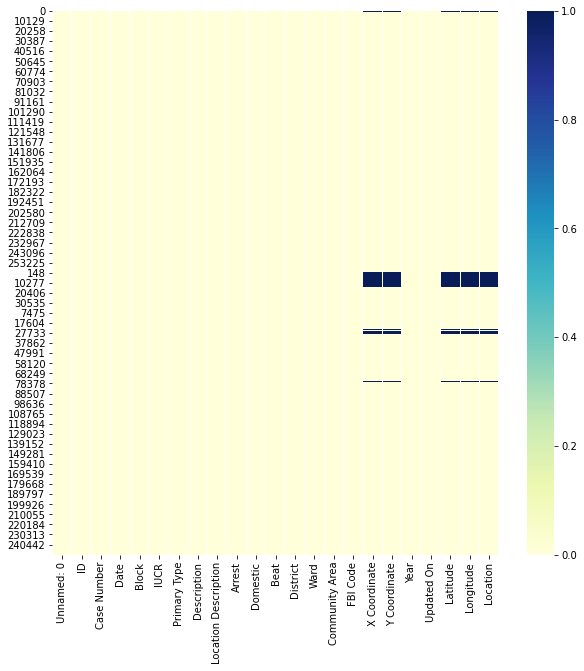

In [106]:
plt.figure(figsize=(10, 10))
sns.heatmap(chicago_df.isnull(), cbar = True, cmap = 'YlGnBu')

In [107]:
chicago_df.shape

(546918, 23)

In [108]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [109]:
chicago_df.shape

(546918, 8)

In [110]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
250518,8701375,07/11/2012 11:24:00 AM,016XX W 51ST ST,BATTERY,SIMPLE,SIDEWALK,False,False
250519,8701376,07/10/2012 03:00:00 PM,022XX N KENNETH AVE,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False
250520,8701377,07/11/2012 01:00:00 PM,054XX S HALSTED ST,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False
250521,8701378,07/11/2012 01:06:00 PM,015XX W ROOSEVELT RD,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False


In [111]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [112]:
chicago_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [113]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)


In [114]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
2012-07-11 11:24:00,8701375,2012-07-11 11:24:00,016XX W 51ST ST,BATTERY,SIMPLE,SIDEWALK,False,False
2012-07-10 15:00:00,8701376,2012-07-10 15:00:00,022XX N KENNETH AVE,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False
2012-07-11 13:00:00,8701377,2012-07-11 13:00:00,054XX S HALSTED ST,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False


In [115]:
chicago_df['Primary Type'].value_counts()

THEFT                                113187
BATTERY                              101313
CRIMINAL DAMAGE                       64662
NARCOTICS                             59220
ASSAULT                               33449
OTHER OFFENSE                         32461
BURGLARY                              30968
MOTOR VEHICLE THEFT                   25556
DECEPTIVE PRACTICE                    20993
ROBBERY                               19972
CRIMINAL TRESPASS                     15433
WEAPONS VIOLATION                      5645
PROSTITUTION                           5443
PUBLIC PEACE VIOLATION                 4293
OFFENSE INVOLVING CHILDREN             3919
CRIM SEXUAL ASSAULT                    2247
SEX OFFENSE                            2070
INTERFERENCE WITH PUBLIC OFFICER       1560
GAMBLING                               1171
LIQUOR LAW VIOLATION                   1027
ARSON                                   859
HOMICIDE                                410
KIDNAPPING                      

In [116]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         113187
BATTERY                       101313
CRIMINAL DAMAGE                64662
NARCOTICS                      59220
ASSAULT                        33449
OTHER OFFENSE                  32461
BURGLARY                       30968
MOTOR VEHICLE THEFT            25556
DECEPTIVE PRACTICE             20993
ROBBERY                        19972
CRIMINAL TRESPASS              15433
WEAPONS VIOLATION               5645
PROSTITUTION                    5443
PUBLIC PEACE VIOLATION          4293
OFFENSE INVOLVING CHILDREN      3919
Name: Primary Type, dtype: int64

In [117]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

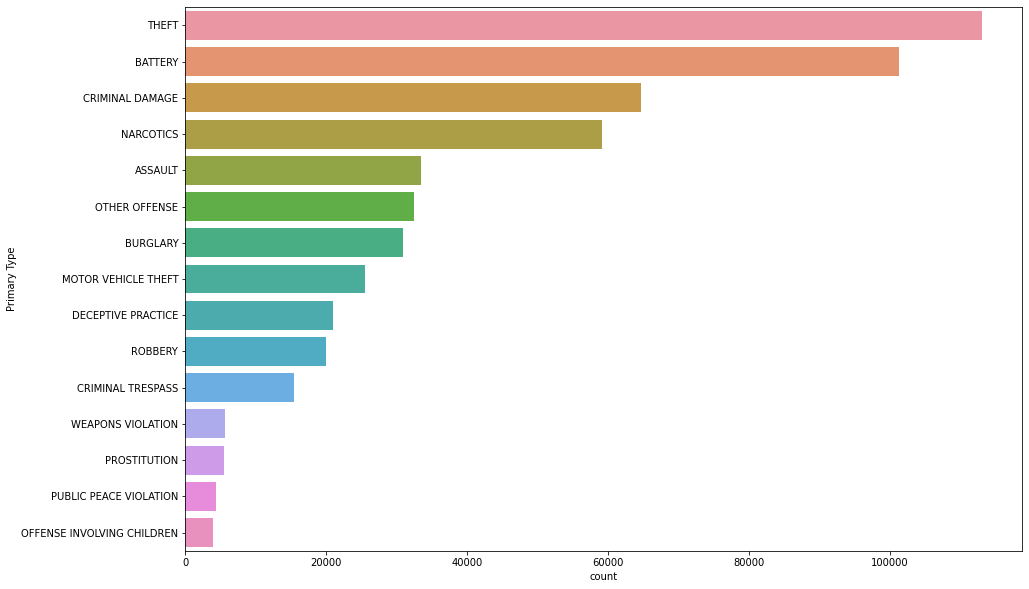

In [118]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

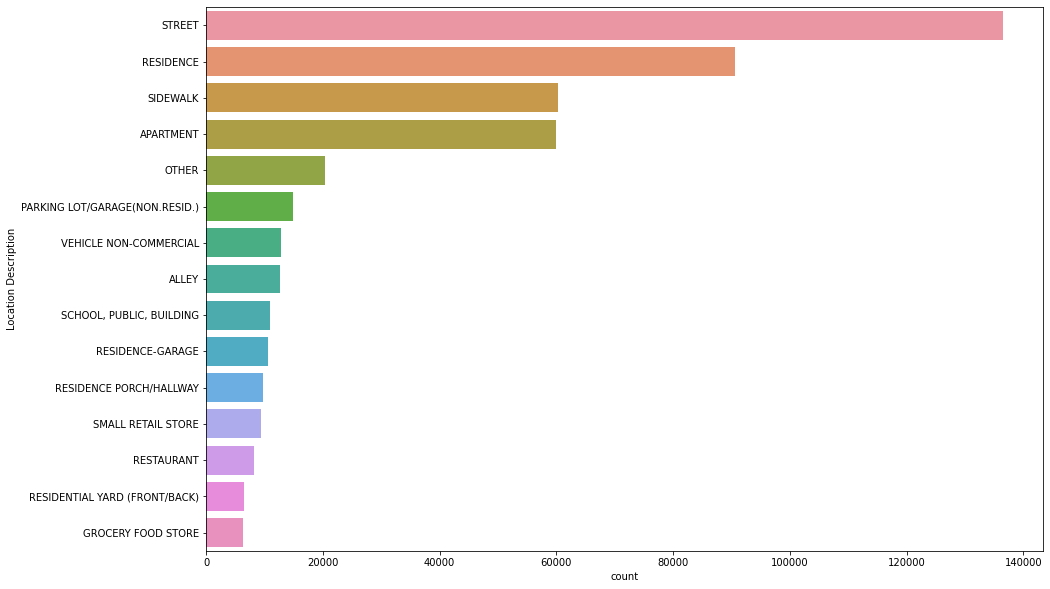

In [119]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [120]:
chicago_df.resample('Y').size()

Date
2005-12-31      1741
2006-12-31    261459
2007-12-31         6
2008-12-31     24939
2009-12-31      6222
2010-12-31      1493
2011-12-31       535
2012-12-31    173932
2013-12-31      1946
2014-12-31      4151
2015-12-31     47454
2016-12-31     23040
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'crime')

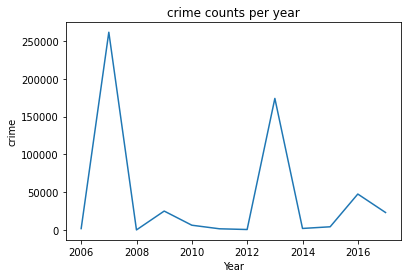

In [121]:
plt.plot(chicago_df.resample('Y').size())
plt.title("crime counts per year")
plt.xlabel('Year')
plt.ylabel('crime')

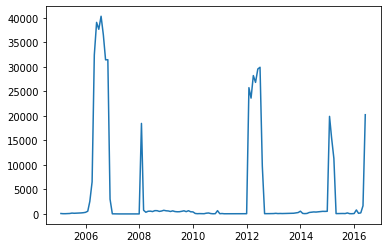

In [122]:
plt.plot(chicago_df.resample('M').size())

In [125]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [126]:
chicago_prophet

,Date,0
0,2005-01-31,83
1,2005-02-28,47
2,2005-03-31,46
3,2005-04-30,76
4,2005-05-31,88
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [127]:
chicago_prophet.columns = ['Date', 'Crime_count']

In [128]:
chicago_prophet

,Date,Crime_count
0,2005-01-31,83
1,2005-02-28,47
2,2005-03-31,46
3,2005-04-30,76
4,2005-05-31,88
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [129]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [130]:
chicago_prophet_df

,Date,Crime_count
0,2005-01-31,83
1,2005-02-28,47
2,2005-03-31,46
3,2005-04-30,76
4,2005-05-31,88
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [131]:
chicago_prophet_df.columns

Index(['Date', 'Crime_count'], dtype='object')

In [135]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns = {'Date': 'ds', 'Crime_count':'y'})

In [136]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,83
1,2005-02-28,47
2,2005-03-31,46
3,2005-04-30,76
4,2005-05-31,88
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [137]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [139]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [140]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,6265.722419,-4682.554551,18843.059268,6265.722419,6265.722419,973.004670,973.004670,973.004670,973.004670,973.004670,973.004670,0.0,0.0,0.0,7238.727089
1,2005-02-28,6237.033407,-6176.501647,17880.799871,6237.033407,6237.033407,-440.292361,-440.292361,-440.292361,-440.292361,-440.292361,-440.292361,0.0,0.0,0.0,5796.741046
2,2005-03-31,6205.270572,-6172.821516,18180.411252,6205.270572,6205.270572,-110.789403,-110.789403,-110.789403,-110.789403,-110.789403,-110.789403,0.0,0.0,0.0,6094.481170
3,2005-04-30,6174.532345,-4221.755223,18089.551895,6174.532345,6174.532345,1148.225203,1148.225203,1148.225203,1148.225203,1148.225203,1148.225203,0.0,0.0,0.0,7322.757548
4,2005-05-31,6142.769510,-2639.229760,21960.622555,6142.769510,6142.769510,3572.600490,3572.600490,3572.600490,3572.600490,3572.600490,3572.600490,0.0,0.0,0.0,9715.370000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2017-05-27,1661.908610,-8808.188107,15627.719644,1661.884445,1661.934842,2006.642321,2006.642321,2006.642321,2006.642321,2006.642321,2006.642321,0.0,0.0,0.0,3668.550931
498,2017-05-28,1660.885399,-8201.366942,16105.045887,1660.861062,1660.911700,2394.135992,2394.135992,2394.135992,2394.135992,2394.135992,2394.135992,0.0,0.0,0.0,4055.021391
499,2017-05-29,1659.862187,-6972.978574,16519.775888,1659.837730,1659.888652,2788.761166,2788.761166,2788.761166,2788.761166,2788.761166,2788.761166,0.0,0.0,0.0,4448.623353
500,2017-05-30,1658.838975,-7156.952314,16956.760319,1658.814226,1658.865571,3183.876116,3183.876116,3183.876116,3183.876116,3183.876116,3183.876116,0.0,0.0,0.0,4842.715091


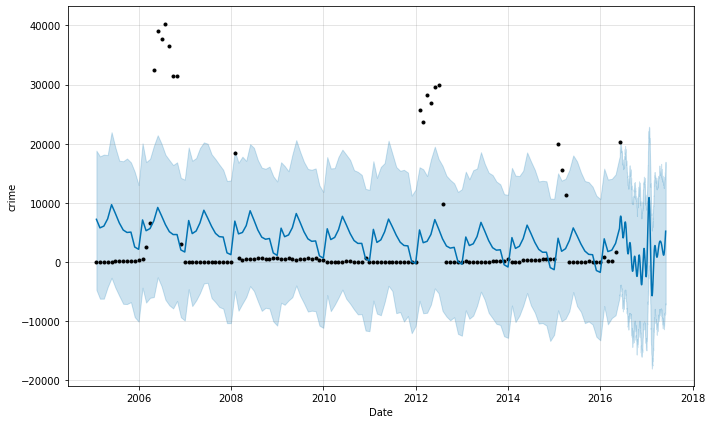

In [141]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'crime')

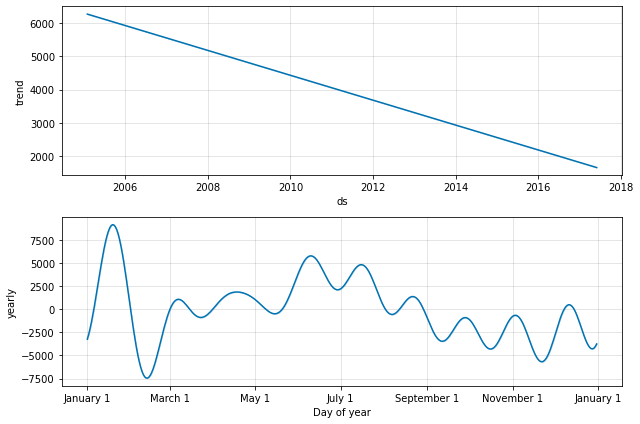

In [142]:
figure3 = m.plot_components(forecast)